Queremos calcular la magnitud absoluta para cada galaxia usando la formula 
 $M=m-25-5*\log_{10}(\frac{c*z}{H})$
 donde c es la velocidad de la luz y $H=75\frac{km}{s*Mpc}$

In [60]:
#Paquetes necesario para el programa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [61]:
datos = pd.read_csv('Galaxias_color_2.csv')

In [62]:
#primero calculamos las magnitudes
#filtramos las galaxias con magnitud r< 17.5
galaxias_brillantes = datos[(datos['petroMag_r'] > 0) & (datos['petroMag_r'] < 17.5) & (datos['z']>0) ].copy()


In [63]:
#Definimos constantes y calculamos magnitudes
c=300000
H=75
#Calculamos la magnitud absoluta y guardamos en una lista M
galaxias_brillantes['M']= galaxias_brillantes['petroMag_r']-25-5*np.log10(c*galaxias_brillantes['z']/H)
galaxias_brillantes

,specObjID,spiral,elliptical,petroMag_u,petroMag_r,petroMag_g,z,M
0,326558284548958208,1,0,19.10832,17.06106,17.73906,0.109850,-21.153244
2,327682805351868416,1,0,19.61019,17.17898,18.05770,0.118198,-21.194371
3,327700122660005888,1,0,18.37072,15.98199,16.99851,0.047356,-20.405199
4,327705620218144768,1,0,19.24683,16.56079,17.41775,0.070256,-20.682924
5,327738330689071104,1,0,19.45817,16.80520,17.55627,0.046149,-19.525916
...,...,...,...,...,...,...,...,...
252406,2446608050354677760,0,1,19.80709,16.92961,17.88036,0.094652,-20.961349
252407,2446608325232584704,0,1,17.01040,14.37269,15.22412,0.047420,-22.017439
252408,2446638286924441600,0,1,19.05713,15.64341,16.54742,0.052210,-20.955660
252411,2446690513726760960,1,0,20.18686,16.94943,17.95427,0.088267,-20.789871


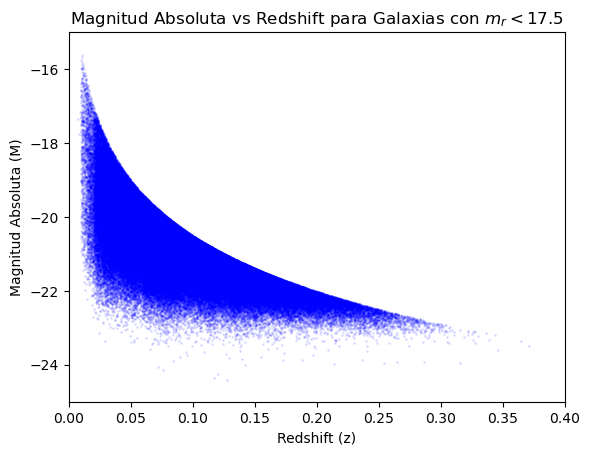

In [64]:
#ploteamos la magnitud absoluta vs el redshift
plt.scatter(galaxias_brillantes['z'], galaxias_brillantes['M'], color='blue',alpha=0.1,s=1, label='Datos')
plt.xlim(0,0.4)
plt.ylim(-25,-15)
plt.title('Magnitud Absoluta vs Redshift para Galaxias con $m_r < 17.5$')
plt.xlabel('Redshift (z)')
plt.ylabel('Magnitud Absoluta (M)')
plt.savefig('Magnitud absoluta vs Redshift', dpi=300, bbox_inches='tight')
plt.show()


A continuacion, observamos que en la grafica de Magnitud Absoluta vs Redshift, los datos tienen cierta tendencia, queremos graficar la envolvente.

In [65]:
#Para esto tomamos una magnitud m_r limite para definir la envolvente utilizando la funcion de magnitud absoluta
m_limite=17.5
#Vamos a definir un rango de valores de redshift para ingresar a la funcion M absoluta y graficar la envolvente
#Como la ecuacion involucra un logaritmo, obviamos z=0
z_envolvente = np.linspace(0.01, 0.35, 100) 
#Ahora calculamos la magnitud absoluta con estos datos de redshift, siguiendo la ecuacion teorica
Mag_abs_envolvente = m_limite - 25 - 5 * np.log10(c * z_envolvente / H) #C y H lo habiamos definido antes

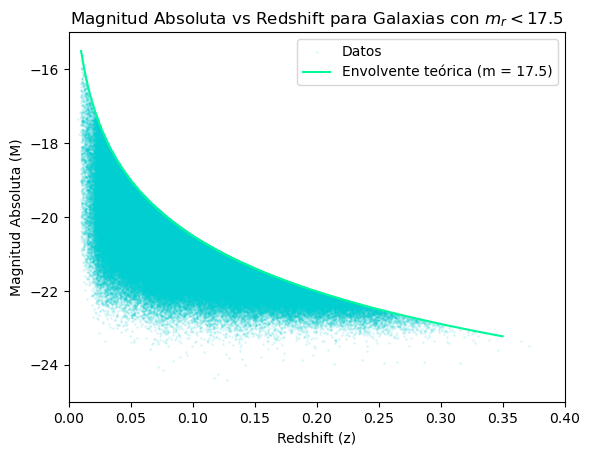

In [67]:
#Ploteamos los datos de magnitud absoluta vs redshift junto con la envolvente
plt.scatter(galaxias_brillantes['z'], galaxias_brillantes['M'], color='darkturquoise', alpha=0.1, s=1, label='Datos')
plt.plot(z_envolvente, Mag_abs_envolvente, color='mediumspringgreen', label='Envolvente teórica (m = 17.5)')
plt.xlim(0, 0.4)
plt.ylim(-25, -15)
plt.title('Magnitud Absoluta vs Redshift para Galaxias con $m_r < 17.5$')
plt.xlabel('Redshift (z)')
plt.ylabel('Magnitud Absoluta (M)')
plt.legend()
plt.savefig('Magnitud_absoluta_vs_Redshift_envolvente.png', dpi=300, bbox_inches='tight')
plt.show()
